### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mipy.signal_models import sphere_models
from mipy.core.acquisition_scheme import (
    acquisition_scheme_from_bvalues,
    acquisition_scheme_from_qvalues)

# Sphere Models

In this section, we describe restricted sphere models, which have been used to represent (tumor)-cells.

Sphere's by their nature have no orientations. Their only estimatable parameter is their diameter.

Similarly to Cylinder models, Spheres have different model approximations that make different assumptions on the acquisition scheme. We start with describing the simplest Dot model (S1), and more towards more general models (S4).

# Dot: S1
The Dot model represents a non-diffusing component, which could represent trapped water in glial cells~\citep{stanisz1997analytical}, or axons with a different orientation to the main bundle~\citep{panagiotaki2009two}.
Notably, \citet{alexander2010orientationally,veraart2016universal} mentions that the contribution of the Dot model is negligible in \emph{in-vivo} acquisitions. 
The signal of a Dot is described by a sphere with a diameter of zero, or equivalently an isotropic Gaussian compartment with $\lambda_{iso}$ set to zero. In other words, it's just a function returning one no matter the input:

\begin{equation}
 E_{\textrm{dot}}=1.
\end{equation}

In [2]:
dot = sphere_models.S1Dot()

## Soderman Sphere: S2

\begin{equation}
E_{sphere}(q,R|\delta\rightarrow0,\Delta\gg R^2/D)=\left(\frac{3}{(2\pi q R) ^ 2}\left(\frac{\sin(2\pi q R)}{(2\pi q R)} - \cos(2\pi q R)\right)\right) ^2
\end{equation}

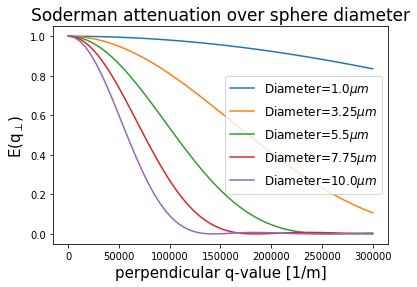

In [9]:
sphere_soderman = sphere_models.S2SphereSodermanApproximation()

Nsamples = 100
bvecs = np.tile(np.r_[0., 1., 0.], (Nsamples, 1))  # doesn't matter it has no orientation
qvals = np.linspace(0, 3e5, Nsamples)
delta = 0.01
Delta = 0.03
scheme = acquisition_scheme_from_qvalues(qvals, bvecs, delta, Delta)

for diameter in np.linspace(1e-6, 1e-5, 5):
    plt.plot(qvals, sphere_soderman(scheme, diameter=diameter),
             label="Diameter="+str(1e6 * diameter)+"$\mu m$")
plt.legend(fontsize=12)
plt.title("Soderman attenuation over sphere diameter", fontsize=17)
plt.xlabel("perpendicular q-value [1/m]", fontsize=15)
plt.ylabel("E(q$_\perp$)", fontsize=15);

## Callaghan Sphere: S3
Coming Soon..

## Van Gelderen Sphere: S4
Coming Soon...

## References
<div class="cite2c-biblio"></div>